<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix

In [112]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('creditcard.csv')

In [113]:
# 5 rows of the dataset
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257368,158129.0,-0.898106,0.969239,0.792984,-1.117539,1.326293,-0.488775,1.048086,0.081205,-0.806875,...,-0.285383,-0.982523,-0.278438,0.599845,0.538983,0.187799,-0.062097,0.059448,1.98,0.0
252416,155799.0,1.995796,-0.215813,-1.789308,0.131812,0.545832,-0.440371,0.283377,-0.309737,0.543342,...,0.257040,0.753436,-0.129626,0.094847,0.373935,-0.101944,-0.030333,-0.043859,73.00,0.0
256618,157778.0,2.069099,0.039705,-1.063987,0.389425,-0.003642,-1.149858,0.265594,-0.400596,0.360016,...,-0.279691,-0.609487,0.318587,0.009306,-0.248349,0.195725,-0.062639,-0.058065,0.99,0.0
167417,118671.0,1.916373,-0.363482,-0.936378,0.073358,-0.247383,-0.696365,-0.079642,-0.088676,0.366631,...,-0.398575,-1.349605,0.456430,-0.397262,-0.746842,0.016375,-0.085849,-0.052420,61.79,0.0
71341,54262.0,-2.799961,-0.618567,1.028167,-1.181561,0.440911,-0.890664,0.764141,-0.262581,0.730656,...,-0.501966,-0.081979,0.590259,0.064422,0.047628,0.753847,0.488753,0.397380,106.85,0.0


In [114]:
df.shape

(275239, 31)

In [115]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275239.000000,275239.000000,275239.000000,275239.000000,275239.000000,275239.000000,275239.000000,275239.000000,275239.000000,275239.000000,...,275238.000000,275238.000000,275238.000000,275238.000000,275238.000000,275238.000000,275238.000000,275238.000000,275238.000000,275238.000000
mean,92222.844481,-0.003950,-0.010540,0.026980,0.005428,-0.010856,0.004764,-0.004533,-0.000718,0.000071,...,-0.000176,-0.002723,-0.001435,0.000070,0.005178,-0.000012,0.000138,0.000280,89.093070,0.001758
std,46190.579702,1.957615,1.653394,1.512944,1.416441,1.381965,1.331547,1.238364,1.193036,1.101641,...,0.737388,0.723399,0.627853,0.606011,0.519531,0.483268,0.402846,0.332222,251.558102,0.041897
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,53151.000000,-0.920600,-0.605175,-0.849402,-0.847148,-0.702759,-0.763222,-0.557771,-0.207071,-0.647487,...,-0.227327,-0.539244,-0.162643,-0.353871,-0.310888,-0.328067,-0.070634,-0.052330,5.830000,0.000000
50%,82250.000000,0.019752,0.060565,0.212362,-0.010668,-0.066757,-0.267905,0.034239,0.023440,-0.052724,...,-0.029981,0.004753,-0.012839,0.042024,0.025907,-0.054488,0.001636,0.011847,22.400000,0.000000
75%,136207.000000,1.302828,0.792921,1.048209,0.756609,0.599143,0.404421,0.563181,0.326713,0.600715,...,0.183736,0.520773,0.144931,0.437428,0.354082,0.242637,0.090264,0.077890,78.080000,0.000000
max,166438.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [116]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275239 entries, 0 to 275238
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    275239 non-null  float64
 1   V1      275239 non-null  float64
 2   V2      275239 non-null  float64
 3   V3      275239 non-null  float64
 4   V4      275239 non-null  float64
 5   V5      275239 non-null  float64
 6   V6      275239 non-null  float64
 7   V7      275239 non-null  float64
 8   V8      275239 non-null  float64
 9   V9      275239 non-null  float64
 10  V10     275239 non-null  float64
 11  V11     275239 non-null  float64
 12  V12     275239 non-null  float64
 13  V13     275239 non-null  float64
 14  V14     275239 non-null  float64
 15  V15     275239 non-null  float64
 16  V16     275239 non-null  float64
 17  V17     275238 non-null  float64
 18  V18     275238 non-null  float64
 19  V19     275238 non-null  float64
 20  V20     275238 non-null  float64
 21  V21     27

In [117]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.121638,-0.021949,-0.417596,-0.105554,0.170796,-0.061101,0.083923,-0.040377,-0.009087,...,0.046999,0.147441,0.050288,-0.017057,-0.232182,-0.043990,-0.004914,-0.008568,-0.006276,-0.011748
V1,0.121638,1.000000,0.014304,-0.000023,-0.006155,-0.001987,-0.000262,-0.002377,0.006534,0.000544,...,0.000365,0.001202,0.001213,-0.001007,0.005464,-0.000692,0.001427,-0.000868,-0.231444,-0.103755
V2,-0.021949,0.014304,1.000000,0.008761,0.002157,0.000560,0.002517,0.000398,-0.005199,-0.003293,...,0.001800,-0.001701,0.002076,0.000570,-0.001530,-0.000274,0.000148,-0.005848,-0.534126,0.093505
V3,-0.417596,-0.000023,0.008761,1.000000,-0.004024,0.001839,-0.003124,0.000848,0.004927,0.004457,...,0.000324,0.003275,0.004644,0.001170,0.000024,0.001662,0.000046,-0.000437,-0.213830,-0.197574
V4,-0.105554,-0.006155,0.002157,-0.004024,1.000000,0.000317,-0.001588,-0.001352,0.001389,0.003235,...,-0.000999,-0.000321,-0.001194,0.000167,-0.000154,-0.000345,0.000928,0.002021,0.099036,0.136125
V5,0.170796,-0.001987,0.000560,0.001839,0.000317,1.000000,-0.002294,-0.003654,0.002344,0.004383,...,0.000088,0.000258,0.004761,-0.001866,0.001123,-0.001914,-0.000468,0.001005,-0.385991,-0.096690
V6,-0.061101,-0.000262,0.002517,-0.003124,-0.001588,-0.002294,1.000000,0.003090,0.000128,0.002589,...,0.000900,-0.000074,-0.001977,-0.001552,0.000795,-0.000650,0.001284,0.000698,0.215940,-0.044534
V7,0.083923,-0.002377,0.000398,0.000848,-0.001352,-0.003654,0.003090,1.000000,0.001805,0.004597,...,-0.003170,0.000178,0.000312,0.000168,-0.001676,-0.001626,-0.002033,0.000872,0.396978,-0.191372
V8,-0.040377,0.006534,-0.005199,0.004927,0.001389,0.002344,0.000128,0.001805,1.000000,-0.002944,...,-0.004794,0.002821,-0.000873,0.000239,-0.000536,0.000527,-0.001834,-0.002485,-0.103333,0.020435
V9,-0.009087,0.000544,-0.003293,0.004457,0.003235,0.004383,0.002589,0.004597,-0.002944,1.000000,...,0.000456,0.002110,-0.002288,-0.000166,0.001511,0.003108,-0.002821,0.000760,-0.043164,-0.099404


In [118]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [119]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0.0    274754
1.0       484
Name: Class, dtype: int64

In [120]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [121]:
print(legit.shape)
print(fraud.shape)

(274754, 31)
(484, 31)


In [122]:
# statistical measures of the data
legit.Amount.describe()

count    274754.000000
mean         89.037575
std         251.545313
min           0.000000
25%           5.880000
50%          22.440000
75%          78.000000
max       25691.160000
Name: Amount, dtype: float64

In [123]:
fraud.Amount.describe()

count     484.000000
mean      120.595992
std       257.053306
min         0.000000
25%         1.000000
50%         8.770000
75%       104.225000
max      2125.870000
Name: Amount, dtype: float64

In [124]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,92245.349771,0.004567,-0.017029,0.039530,-0.002667,-0.005247,0.007257,0.005413,-0.001740,0.004666,...,-0.000092,-0.001449,-0.002747,-0.001362,0.000261,0.005113,-0.000100,-0.000156,0.000146,89.037575
1.0,79293.849174,-4.843268,3.672953,-7.095002,4.599361,-3.194524,-1.408096,-5.651005,0.580155,-2.609053,...,0.372818,0.722445,0.010374,-0.042890,-0.108396,0.041991,0.050101,0.167323,0.076402,120.595992


In [125]:
legit_sample = legit.sample(n=492)

In [126]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [127]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
34135,37528.0,-1.040021,0.883342,1.636717,0.519834,0.657872,-0.510623,0.924124,-0.192465,-0.840077,...,-0.148192,-0.435021,-0.341794,-0.113000,0.462665,-0.483925,0.003174,0.038892,59.00,0.0
267642,162857.0,2.167290,-0.715980,-1.616461,-1.013944,-0.017394,0.307857,-1.039765,0.130376,-0.214188,...,0.229607,0.715574,-0.000659,-0.443143,-0.021997,-0.074141,0.025093,-0.024155,19.95,0.0
27149,34413.0,1.257352,0.310889,0.293810,0.699069,-0.427899,-1.088812,0.042526,-0.167482,0.128971,...,-0.295395,-0.881604,0.137718,0.327899,0.194823,0.096621,-0.027084,0.029319,0.99,0.0
204708,135406.0,1.939877,-0.700215,-0.246316,0.163992,-1.054931,-0.384456,-0.919415,0.232783,1.626413,...,0.212314,0.728282,0.173575,-0.005860,-0.308735,0.114207,0.000182,-0.057566,5.00,0.0
1346,1050.0,-0.202717,-0.409711,1.008929,0.130943,-1.499126,1.021929,-1.522395,-2.443950,1.196464,...,-1.024973,1.180265,-0.308460,0.105945,0.861746,-0.175620,0.185887,0.284696,198.83,0.0


In [128]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
263877,161154.0,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.38,1.0
268375,163181.0,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,-2.971644,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,39.98,1.0
272521,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31,1.0
274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1.0
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1.0


In [129]:
new_dataset['Class'].value_counts()

0.0    492
1.0    484
Name: Class, dtype: int64

In [130]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,94185.373984,0.173493,-0.046705,-0.057604,0.022524,0.025494,0.037580,0.001592,0.048973,0.048946,...,-0.026167,-0.020440,0.006318,-0.001569,-0.046651,0.008271,0.008659,-0.015253,-0.003906,86.482033
1.0,79293.849174,-4.843268,3.672953,-7.095002,4.599361,-3.194524,-1.408096,-5.651005,0.580155,-2.609053,...,0.372818,0.722445,0.010374,-0.042890,-0.108396,0.041991,0.050101,0.167323,0.076402,120.595992


In [131]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [133]:
print(X.shape, X_train.shape, X_test.shape)

(976, 30) (780, 30) (196, 30)


In [134]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("KNN Accuracy:", int(100*accuracy),"%")
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

KNN Accuracy: 62 %
KNN Precision: 0.6340760717224417
KNN Recall: 0.6275510204081632
KNN F1 score: 0.6218841112693391
Confusion Matrix
[[74 25]
 [48 49]]


In [135]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("DTC Accuracy:", int(100*accuracy),"%")
print("DTC Precision:", precision)
print("DTC Recall:", recall)
print("DTC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

DTC Accuracy: 89 %
DTC Precision: 0.8931923833363132
DTC Recall: 0.8928571428571429
DTC F1 score: 0.8928152803670504
Confusion Matrix
[[90  9]
 [12 85]]


In [136]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("RFC Accuracy:", int(100*accuracy),"%")
print("RFC Precision:", precision)
print("RFC Recall:", recall)
print("RFC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

RFC Accuracy: 93 %
RFC Precision: 0.9373067408781695
RFC Recall: 0.9336734693877551
RFC F1 score: 0.9335020024461018
Confusion Matrix
[[97  2]
 [11 86]]


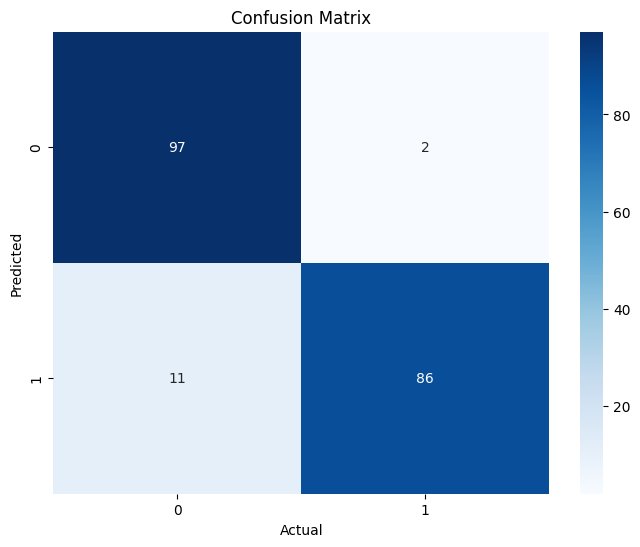

In [137]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [138]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("RFC Accuracy:", int(100*accuracy),"%")
print("RFC Precision:", precision)
print("RFC Recall:", recall)
print("RFC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

RFC Accuracy: 93 %
RFC Precision: 0.9340597941304182
RFC Recall: 0.9336734693877551
RFC F1 score: 0.9336475545129359
Confusion Matrix
[[94  5]
 [ 8 89]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


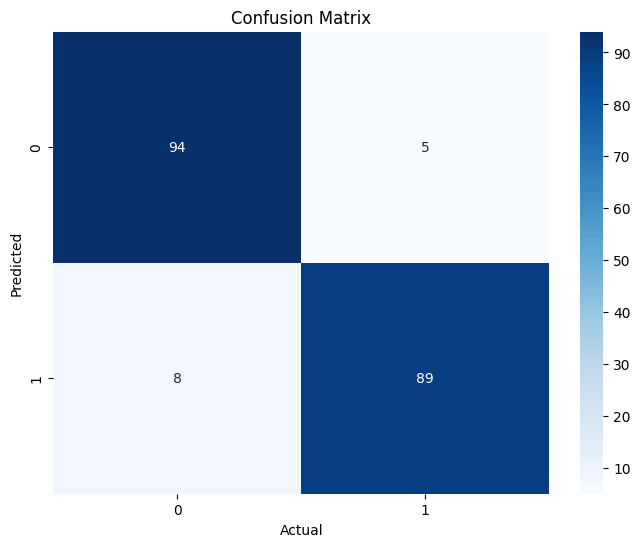

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [140]:
g=GaussianNB()
g.fit(X_train,y_train)
y_pred = g.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("GNB Accuracy:", int(100*accuracy),"%")
print("GNB Precision:", precision)
print("GNB Recall:", recall)
print("GNB F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

GNB Accuracy: 88 %
GNB Precision: 0.9047758447641352
GNB Recall: 0.8826530612244898
GNB F1 score: 0.8808675967012987
Confusion Matrix
[[99  0]
 [23 74]]


In [141]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("SVM Accuracy:", int(100*accuracy),"%")
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

SVM Accuracy: 52 %
SVM Precision: 0.5263841647770219
SVM Recall: 0.5255102040816326
SVM F1 score: 0.5242848358855737
Confusion Matrix
[[47 52]
 [41 56]]


I this Credit card fraud detection Random forest and logistic regression is performing very well, gives 93% of accuracy..